## Stock Price Prediction Using KNN

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# For fetching the stock data - yfinance
import yfinance as yf

In [8]:
# Define the correct stock ticker for Tata Consumer Products Limited
ticker = "TATACONSUM.NS"

# Fetch stock data
data = yf.download(ticker, start="2020-01-01", end="2024-12-31")

# Display the first few rows of the data
print(data.head())

# Display the data in Jupyter Notebook
data.head()


[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker     TATACONSUM.NS TATACONSUM.NS TATACONSUM.NS TATACONSUM.NS   
Date                                                                 
2020-01-01    311.602081    312.468038    306.598732    309.196631   
2020-01-02    311.121033    315.065978    308.956127    311.361578   
2020-01-03    306.165771    311.553957    305.011143    311.553957   
2020-01-06    300.296478    306.117657    298.660760    303.327340   
2020-01-07    302.990570    307.320381    300.200253    302.124614   

Price             Volume  
Ticker     TATACONSUM.NS  
Date                      
2020-01-01       1514293  
2020-01-02       3091351  
2020-01-03       1718884  
2020-01-06       1712158  
2020-01-07       2146089  


Price,Close,High,Low,Open,Volume
Ticker,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS
Date,,,,,
2020-01-01,311.602081,312.468038,306.598732,309.196631,1514293
2020-01-02,311.121033,315.065978,308.956127,311.361578,3091351
2020-01-03,306.165771,311.553957,305.011143,311.553957,1718884
2020-01-06,300.296478,306.117657,298.660760,303.327340,1712158
2020-01-07,302.990570,307.320381,300.200253,302.124614,2146089


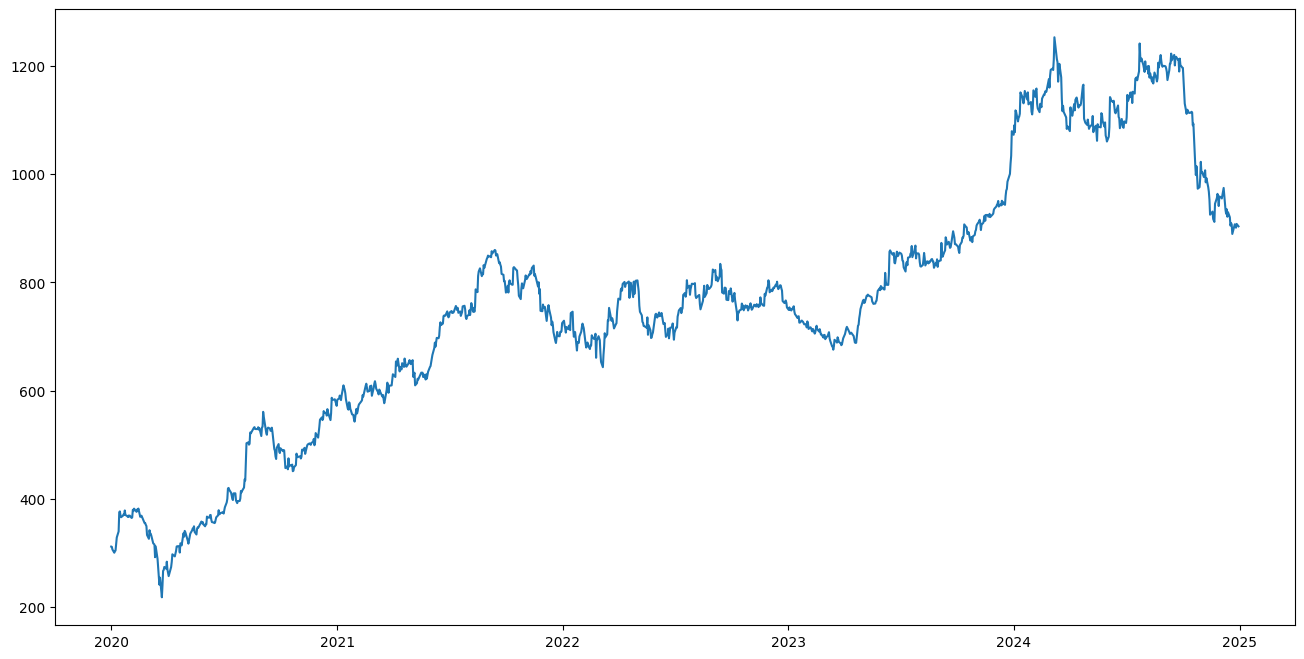

In [9]:
# Prediction will be based on the Closing Price -- > target - Regression Problem
# Classification - Buy (if todays price is lesser than yesterday or the stock will tend to show great progress in future) --> +1
# Classification - Sell (if todays price is more than yesterday or the stock will tend to show low progress in future) --> +1

plt.figure(figsize=(16,8))
plt.plot(data['Close'], label = 'Closing Price')


Classification Problem : Buy(+1) or Sell(-1) the stock

In [11]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

Input features to predict wether a customer should buy or sell the stock

In [12]:
X = data[['Open - Close', 'High - Low']]
X.head()

Price,Open - Close,High - Low
Ticker,,
Date,,
2020-01-01,-2.405451,5.869305
2020-01-02,0.240545,6.109851
2020-01-03,5.388186,6.542814
2020-01-06,3.030862,7.456897
2020-01-07,-0.865956,7.120128


Intention is to store +1 for the buy signal and -1 for the sell signal. The target variable is "Y" for Classification task

In [13]:
Y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [14]:
Y

array([[-1],
       [-1],
       [-1],
       ...,
       [ 1],
       [-1],
       [-1]], shape=(1237, 1))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=44)

In [18]:
# Reshape the target variables to 1D
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

Implementation of KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Using GridSearch to find the best parameter
params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

# fit the model
model.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print('Train_data Accuracy : %.2f' %accuracy_train)
print('Test_data Accuracy : %.2f' %accuracy_test)

Train_data Accuracy : 0.65
Test_data Accuracy : 0.52


In [20]:
predictions_classification = model.predict(X_test)

In [21]:
actual_predicted_data = pd.DataFrame({'Actual Class' : Y_test, 'Predicted Class' : predictions_classification})

In [22]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,1,-1
1,1,1
2,1,1
3,1,-1
4,-1,-1
5,1,-1
6,-1,-1
7,1,1
8,-1,1
9,1,-1


In [35]:
# Save the model:
import joblib

# Save the trained model to a file
joblib.dump(model.best_estimator_, 'knn_model.pkl')

print("Model saved successfully!")


Model saved successfully!
